In [1]:
from ROOT import TFile,TTree,TCanvas,TH1F,gStyle,TLatex,gPad,TLegend,TLorentzVector,TH2F,TLine,TF1,TBox,RDataFrame,TPad,TF2
import ROOT
import numpy as np
import awkward as awk
import uproot
import pandas as pd
import matplotlib.pyplot as plot
from pandas import read_excel 
from copy import deepcopy
from ipywidgets import *
import logging, os 
import time
logging.disable(logging.WARNING) 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow as tf
# print("tf.__version__", tf.__version__)


Welcome to JupyROOT 6.22/06


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-7_irmqs2 because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
d_plus = RDataFrame("tree_MC_plus", "../../OutputFiles/Slurm/Oct_27/file_*.root")
d_minus = RDataFrame("tree_MC_minus", "../../OutputFiles/Slurm/Oct_27/file_*.root")
print(d_plus.GetColumnNames())

{ "z", "x", "pT", "Q2", "R0max", "R1max", "R2max", "Mh", "q_TdivQ" }


In [3]:
upr = uproot.open("../../OutputFiles/Slurm/Oct_27/file_1.root:tree_MC_plus")
arr = upr.arrays(["z", "x", "pT", "Q2", "R0max","R1max", "R2max", "Mh", "q_TdivQ"],library="pd")

In [4]:
#Bins (each has 8 including 0)
Mhbins = np.linspace(0,1.3,8)
pTbins = np.linspace(0.1,0.8,8)
xbins = np.array([0,0.1,0.13,0.16,0.19,0.235,0.3,0.5])
zbins = np.array([0,0.35,0.43,0.49,0.55,0.62,0.7,0.83])
Q2bins = np.array([0,1.2,1.8,2.3,3.1,4.3,7,11.1])

In [5]:
varName = np.array(["x", "z", "Q2", "pT", "R0max", "R1max", "R2max"])

In [6]:
px = [0 for i in range(7)]
pz = [0 for i in range(7)]
pMh=[0 for i in range(7)]
ppT=[0 for i in range(7)]
pxQ2 = [0 for i in range(7)]

pxcut = [0 for i in range(7)]
pzcut = [0 for i in range(7)]
pMhcut=[0 for i in range(7)]
ppTcut=[0 for i in range(7)]


In [7]:
start_time = time.time()
xformat = "x <= {} && x > {}"
zformat = "z <= {} && z > {}"
Mhformat = "Mh <= {} && Mh > {}"
pTformat = "pT <= {} && pT > {}"
R0format = "R0max <= {} && R0max > {}"
R1format = "R1max <= {} && R1max > {}"
R2format = "R2max <= {} && R2max > {}"


#Piplus
#x bins
#i is the kinematic variable
#j is the bin num
for i in range(7):
    pxcut[i] = d_plus.Filter(xformat.format(xbins[i + 1],xbins[i])).Filter("R0max < 0.3").Filter("R2max < 0.3").Filter("R1max < 0.3").Count()
    px[i] = d_plus.Filter(xformat.format(xbins[i + 1],xbins[i])).Count()
    pMhcut[i] = d_plus.Filter(Mhformat.format(Mhbins[i + 1],Mhbins[i])).Filter("R0max < 0.3").Filter("R2max < 0.3").Filter("R1max < 0.3").Count()
    pMh[i] = d_plus.Filter(Mhformat.format(Mhbins[i + 1],Mhbins[i])).Count()
    pzcut[i] = d_plus.Filter(zformat.format(zbins[i + 1],zbins[i])).Filter("R0max < 0.3").Filter("R2max < 0.3").Filter("R1max < 0.3").Count() 
    pz[i] = d_plus.Filter(zformat.format(zbins[i + 1],zbins[i])).Count()
    ppTcut[i] = d_plus.Filter(pTformat.format(pTbins[i + 1],pTbins[i])).Filter("R0max < 0.3").Filter("R2max < 0.3").Filter("R1max < 0.3").Count()
    ppT[i] = d_plus.Filter(pTformat.format(pTbins[i + 1],pTbins[i])).Count()
        


In [8]:
for i in range(7):
    pxcut[i] = d_plus.Filter(xformat.format(xbins[i + 1],xbins[i])).Filter("R0max < 0.3 && R0max > 0").Filter("R2max < 0.3 && R2max > 0").Filter("R1max < 0.3 && R1max > 0").Count()
    px[i] = d_plus.Filter(xformat.format(xbins[i + 1],xbins[i])).Count()
    pMhcut[i] = d_plus.Filter(Mhformat.format(Mhbins[i + 1],Mhbins[i])).Filter("R0max < 0.3 && R0max > 0").Filter("R2max < 0.3 && R2max > 0").Filter("R1max < 0.3 && R1max > 0").Count()
    pMh[i] = d_plus.Filter(Mhformat.format(Mhbins[i + 1],Mhbins[i])).Count()
    pzcut[i] = d_plus.Filter(zformat.format(zbins[i + 1],zbins[i])).Filter("R0max < 0.3 && R0max > 0").Filter("R2max < 0.3 && R2max > 0").Filter("R1max < 0.3 && R1max > 0").Count() 
    pz[i] = d_plus.Filter(zformat.format(zbins[i + 1],zbins[i])).Count()
    ppTcut[i] = d_plus.Filter(pTformat.format(pTbins[i + 1],pTbins[i])).Filter("R0max < 0.3 && R0max > 0").Filter("R2max < 0.3 && R2max > 0").Filter("R1max < 0.3 && R1max > 0").Count()
    ppT[i] = d_plus.Filter(pTformat.format(pTbins[i + 1],pTbins[i])).Count()

In [9]:
start_time = time.time()
xformat = "x <= {} && x > {}"
zformat = "z <= {} && z > {}"
Mhformat = "Mh <= {} && Mh > {}"
pTformat = "pT <= {} && pT > {}"
R0format = "R0max <= {}"
R1format = "R1max <= {}"
R2format = "R2max <= {}"
RALLcut = 1
# RALLcut = 0.3
R0cut = RALLcut
R1cut = RALLcut
R2cut = RALLcut

#Piplus
#x bins
#i is the kinematic variable
#j is the bin num
for i in range(7):
    pxcut[i] = d_plus.Filter(xformat.format(xbins[i + 1],xbins[i])).Filter(R0format.format(R0cut)).Filter(R1format.format(R1cut)).Filter(R2format.format(R2cut)).Count()
    px[i] = d_plus.Filter(xformat.format(xbins[i + 1],xbins[i])).Count()
    pMhcut[i] = d_plus.Filter(Mhformat.format(Mhbins[i + 1],Mhbins[i])).Filter(R0format.format(R0cut)).Filter(R1format.format(R1cut)).Filter(R2format.format(R2cut)).Count()
    pMh[i] = d_plus.Filter(Mhformat.format(Mhbins[i + 1],Mhbins[i])).Count()
    pzcut[i] = d_plus.Filter(zformat.format(zbins[i + 1],zbins[i])).Filter(R0format.format(R0cut)).Filter(R1format.format(R1cut)).Filter(R2format.format(R2cut)).Count() 
    pz[i] = d_plus.Filter(zformat.format(zbins[i + 1],zbins[i])).Count()
    ppTcut[i] = d_plus.Filter(pTformat.format(pTbins[i + 1],pTbins[i])).Filter(R0format.format(R0cut)).Filter(R1format.format(R1cut)).Filter(R2format.format(R2cut)).Count()
    ppT[i] = d_plus.Filter(pTformat.format(pTbins[i + 1],pTbins[i])).Count()
        


In [10]:
for i in range(7):
    pxcut[i] = pxcut[i].GetValue()
    px[i] = px[i].GetValue()
    pMhcut[i] = pMhcut[i].GetValue()
    pMh[i] = pMh[i].GetValue()
    pzcut[i] = pzcut[i].GetValue()
    pz[i] = pz[i].GetValue()
    ppTcut[i] = ppTcut[i].GetValue()
    ppT[i] = ppT[i].GetValue()

In [11]:
pxval = [0 for i in range(7)]
pzval = [0 for i in range(7)]
pMhval=[0 for i in range(7)]
ppTval=[0 for i in range(7)]
Mhbinsno0 = np.linspace(0.3,1.3,7)
pTbinsno0 = np.linspace(0.2,0.8,7)
xbinsno0 = np.array([0.1,0.13,0.16,0.19,0.235,0.3,0.5])
zbinsno0 = np.array([0.35,0.43,0.49,0.55,0.62,0.7,0.83])

In [12]:
for i in range(7):
    if(px[i] == 0):
        pxval[i] = 0
    else: pxval[i] = pxcut[i] / px[i]
    if(pz[i] == 0):
        pzval[i] = 0
    else: pzval[i] = pzcut[i] / pz[i]
    if(ppT[i] == 0):
        ppTval[i] = 0
    else: ppTval[i] = ppTcut[i] / ppT[i]
    if(pMh[i] == 0):
        pMhval[i] = 0
    else: pMhval[i] = pMhcut[i] / pMh[i]
    
    
    
    

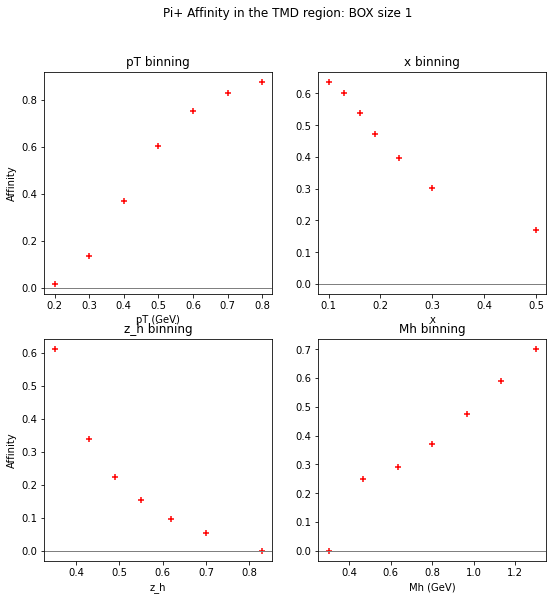

In [13]:
fig2, ((ax12, ax22), (ax32, ax42)) = plot.subplots(2, 2, figsize = (9, 9))
fig2.suptitle("Pi+ Affinity in the TMD region: BOX size 1")
# fig2.ylable("Affinity")
ax12.set(ylabel = "Affinity")
ax12.scatter(pTbinsno0, ppTval, c = 'r', marker = "+")
# fig2.legend(shadow = "true", title = "Key", fontsize = 12)
ax12.axhline(y=0, color="gray", lw = 1)
ax12.set_title("pT binning")
ax12.set(xlabel = "pT (GeV)")
ax22.scatter(xbinsno0, pxval, c = 'r', marker = '+')
ax22.axhline(y=0, color="gray", lw = 1)
ax22.set_title("x binning")
ax22.set(xlabel = "x")
ax32.scatter(zbinsno0, pzval, c = 'r', marker = '+')
ax32.axhline(y=0, color="gray", lw = 1)
ax32.set_title("z_h binning")
ax32.set(xlabel = "z_h")
ax32.set(ylabel = "Affinity")
ax42.scatter(Mhbinsno0, pMhval, c = 'r', marker = "+")
ax42.axhline(y=0, color="gray", lw = 1)
ax42.set_title("Mh binning")
ax42.set(xlabel = "Mh (GeV)")
plot.savefig("Plots/TMDbigBox.jpeg")
